<a href="https://colab.research.google.com/github/hyanquiv/CV-detection-topbottom/blob/master/notebooks/transfer_learning_yolo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!nvidia-smi

Tue Jul  8 03:52:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="CqVCYUbCvHjLl6bCMcMQ")
project = rf.workspace("clothing-jr7a4").project("clothing-detection-s4ioc")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Clothing-Detection-6 in yolov8:: 100%|██████████| 6200/6200 [00:01<00:00, 3555.99it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Actualizar YAML
#nc: 3
#names: [top, bottom, exposed]

In [ ]:
import os

# Rutas base y subdirectorios
base_dir = "/content/Clothing-Detection-6"
splits = ["train", "valid", "test"]

# Mapeo de clases originales a nuevas
# Formato: original_id : new_id
class_map = {
    0: 2,   # Exposed -> exposed
    4: 0,   # Hoodie -> top
    5: 0,   # Jacket -> top
    6: 1,   # Long Pants -> bottom
    7: 0,   # Long Shirt -> top
    8: 1,   # Long Skirt -> bottom
    10: 0,  # Shirt -> top
    11: 1,  # Short -> bottom
    12: 1,  # Short Skirt -> bottom
    13: 0   # SleevelessShirt -> top
}

for split in splits:
    label_dir = os.path.join(base_dir, split, "labels")
    print(f"Procesando: {label_dir}")
    for file_name in os.listdir(label_dir):
        path = os.path.join(label_dir, file_name)
        new_lines = []

        with open(path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 5:
                    continue  # línea inválida

                class_id = int(parts[0])
                if class_id in class_map:
                    new_class = class_map[class_id]
                    new_line = f"{new_class} " + " ".join(parts[1:])
                    new_lines.append(new_line)

        # Guardar solo si hay detecciones válidas
        if new_lines:
            with open(path, "w") as f:
                f.write("\n".join(new_lines))
        else:
            os.remove(path)  # eliminar archivos sin detecciones útiles

Procesando: /content/Clothing-Detection-6/train/labels
Procesando: /content/Clothing-Detection-6/valid/labels
Procesando: /content/Clothing-Detection-6/test/labels


In [ ]:
import os
from collections import Counter

# Ruta base del dataset
base_path = "/content/Clothing-Detection-6"
splits = ["train", "valid", "test"]
total_counter = Counter()

for split in splits:
    label_dir = os.path.join(base_path, split, "labels")
    split_counter = Counter()

    for fname in os.listdir(label_dir):
        fpath = os.path.join(label_dir, fname)
        with open(fpath, "r") as f:
            for line in f:
                parts = line.strip().split()
                if parts:
                    class_id = int(parts[0])
                    split_counter[class_id] += 1
                    total_counter[class_id] += 1

    print(f"\n📂 {split.upper()} - conteo de etiquetas:")
    for cid, count in sorted(split_counter.items()):
        print(f"Clase {cid}: {count} etiquetas")

print("\n📊 TOTAL GENERAL:")
for cid, count in sorted(total_counter.items()):
    print(f"Clase {cid}: {count} etiquetas")



📂 TRAIN - conteo de etiquetas:
Clase 0: 1999 etiquetas
Clase 1: 1776 etiquetas
Clase 2: 264 etiquetas

📂 VALID - conteo de etiquetas:
Clase 0: 225 etiquetas
Clase 1: 239 etiquetas
Clase 2: 34 etiquetas

📂 TEST - conteo de etiquetas:
Clase 0: 108 etiquetas
Clase 1: 135 etiquetas
Clase 2: 14 etiquetas

📊 TOTAL GENERAL:
Clase 0: 2332 etiquetas
Clase 1: 2150 etiquetas
Clase 2: 312 etiquetas


In [ ]:
from ultralytics import YOLO

# Cargar modelo preentrenado (puedes cambiar a yolov8s.pt o yolov8n.pt si lo prefieres)
model = YOLO("yolov8n.pt")

# ✅ Callback personalizado para congelar las primeras 10 capas al iniciar entrenamiento
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 10
    print(f"\n[INFO] Congelando las primeras {num_freeze} capas...\n")

    freeze_prefixes = [f'model.{i}.' for i in range(num_freeze)]

    for name, param in model.named_parameters():
        param.requires_grad = True  # por defecto entrenable
        if any(prefix in name for prefix in freeze_prefixes):
            param.requires_grad = False
            print(f"❄️ {name} congelado")

    print(f"\n✅ Se congelaron {num_freeze} capas correctamente.\n")

# Registrar el callback
model.add_callback("on_train_start", freeze_layer)

In [ ]:
model.train(
    data="/content/Clothing-Detection-6/data.yaml",  # Ruta a tu archivo YAML
    epochs=50,
    imgsz=640,
    batch=8,
    optimizer="SGD",
    lr0=0.01,
    weight_decay=0.0005,
    patience=15,
    augment=True,
    cache="ram",
    name="clothing_freeze10_x",
    project="runs/train",
    exist_ok=True
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Clothing-Detection-6/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=clothing_freeze10_x, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=1

train: Scanning /content/Clothing-Detection-6/train/labels.cache... 2546 images, 109 backgrounds, 0 corrupt: 100%|██████████| 2655/2655 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (3.0GB RAM): 100%|██████████| 2655/2655 [00:07<00:00, 360.74it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 150.0±199.8 MB/s, size: 47.8 KB)


val: Scanning /content/Clothing-Detection-6/valid/labels.cache... 274 images, 9 backgrounds, 0 corrupt: 100%|██████████| 283/283 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 498. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 283/283 [00:01<00:00, 226.77it/s]


Plotting labels to runs/train/clothing_freeze10_x/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


[INFO] Congelando las primeras 10 capas...

❄️ model.0.conv.weight congelado

❄️ model.0.bn.weight congelado

❄️ model.0.bn.bias congelado

❄️ model.1.conv.weight congelado

❄️ model.1.bn.weight congelado

❄️ model.1.bn.bias congelado

❄️ model.2.cv1.conv.weight congelado

❄️ model.2.cv1.bn.weight congelado

❄️ model.2.cv1.bn.bias congelado

❄️ model.2.cv2.conv.weight congelado

❄️ model.2.cv2.bn.weight congelado

❄️ model.2.cv2.bn.bias congelado

❄️ model.2.m.0.cv1.conv.weight congelado

❄️ model.2.m.0.cv1.bn.weight congelado

❄️ model.2.m.0.cv1.bn.bias congelado

❄️ model.2.m.0.cv2.conv.weight congelado

❄️ model.2.m.0.cv2.bn.weight congelado

❄️ model.2.m.0.cv2.bn.bias congelado

❄️ model.3.conv.weight congelado

❄️ model.3.bn.weight congelado

❄️ model.3.bn.bias congelado

❄️ model.4.cv1.conv.weight congelado

❄️ model.4.cv1.bn.weight congelado

❄️ model.4.cv1.bn.bias congelado

❄️ model.4.cv2.conv.weight congelado

❄️ model.4.cv2.bn.weight congelado

❄️ model.4.cv2.bn.bias congelado

❄️ model.4.m.0.cv1.conv.weight congelado

❄️ model.4.m.0.cv1.bn.weight congelado

❄️ model.4.m.0.cv1.bn.bias congelado

❄️ model.4.m.0.cv2.conv.weight congelado

❄️ model.4.m.0.cv2.bn.weight congelado

❄️ model.4.m.0.cv2.bn.bias congelado

❄️ model.4.m.1.cv1.conv.weight congelado

❄️ model.4.m.1.cv1.bn.weight congelado

❄️ model.4.m.1.cv1.bn.bias congelado

❄️ model.4.m.1.cv2.conv.weight congelado

❄️ model.4.m.1.cv2.bn.weight congelado

❄️ model.4.m.1.cv2.bn.bias congelado

❄️ model.5.conv.weight congelado

❄️ model.5.bn.weight congelado

❄️ model.5.bn.bias congelado

❄️ model.6.cv1.conv.weight congelado

❄️ model.6.cv1.bn.weight congelado

❄️ model.6.cv1.bn.bias congelado

❄️ model.6.cv2.conv.weight congelado

❄️ model.6.cv2.bn.weight congelado

❄️ model.6.cv2.bn.bias congelado

❄️ model.6.m.0.cv1.conv.weight congelado

❄️ model.6.m.0.cv1.bn.weight congelado

❄️ model.6.m.0.cv1.bn.bias congelado

❄️ model.6.m.0.cv2.conv.weight congelado

❄️ model.6.m.0.cv2.bn.weight congelado

❄️ model.6.m.0.cv2.bn.bias congelado

❄️ model.6.m.1.cv1.conv.weight congelado

❄️ model.6.m.1.cv1.bn.weight congelado

❄️ model.6.m.1.cv1.bn.bias congelado

❄️ model.6.m.1.cv2.conv.weight congelado

❄️ model.6.m.1.cv2.bn.weight congelado

❄️ model.6.m.1.cv2.bn.bias congelado

❄️ model.7.conv.weight congelado

❄️ model.7.bn.weight congelado

❄️ model.7.bn.bias congelado

❄️ model.8.cv1.conv.weight congelado

❄️ model.8.cv1.bn.weight congelado

❄️ model.8.cv1.bn.bias congelado

❄️ model.8.cv2.conv.weight congelado

❄️ model.8.cv2.bn.weight congelado

❄️ model.8.cv2.bn.bias congelado

❄️ model.8.m.0.cv1.conv.weight congelado

❄️ model.8.m.0.cv1.bn.weight congelado

❄️ model.8.m.0.cv1.bn.bias congelado

❄️ model.8.m.0.cv2.conv.weight congelado

❄️ model.8.m.0.cv2.bn.weight congelado

❄️ model.8.m.0.cv2.bn.bias congelado

❄️ model.9.cv1.conv.weight congelado

❄️ model.9.cv1.bn.weight congelado

❄️ model.9.cv1.bn.bias congelado

❄️ model.9.cv2.conv.weight congelado

❄️ model.9.cv2.bn.weight congelado

❄️ model.9.cv2.bn.bias congelado

✅ Se congelaron 10 capas correctamente.

Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/clothing_freeze10_x
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.36G      1.077      2.223      1.434         13        640: 100%|██████████| 332/332 [00:49<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.66it/s]

                   all        283        498      0.748      0.481      0.483      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.36G      1.039       1.53      1.359         21        640: 100%|██████████| 332/332 [00:44<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.09it/s]

                   all        283        498       0.83       0.46      0.567      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.36G      1.091      1.391      1.385         24        640: 100%|██████████| 332/332 [00:45<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.94it/s]

                   all        283        498      0.589      0.576      0.594      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.36G      1.109      1.303      1.398         23        640: 100%|██████████| 332/332 [00:45<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.04it/s]


                   all        283        498      0.604      0.646       0.65      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.36G      1.104       1.22       1.38         30        640: 100%|██████████| 332/332 [00:43<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.76it/s]

                   all        283        498      0.551      0.614      0.582      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.36G      1.081      1.146      1.371         25        640: 100%|██████████| 332/332 [00:43<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.86it/s]


                   all        283        498      0.684      0.657      0.713      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.36G       1.03      1.062      1.332         18        640: 100%|██████████| 332/332 [00:46<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.14it/s]


                   all        283        498      0.685      0.737      0.749       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.36G      1.013      1.007      1.311         18        640: 100%|██████████| 332/332 [00:44<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.52it/s]

                   all        283        498      0.707       0.73      0.768      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.36G      1.006     0.9872      1.314         20        640: 100%|██████████| 332/332 [00:44<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.17it/s]

                   all        283        498      0.709      0.733      0.759      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.36G     0.9857     0.9424      1.302         25        640: 100%|██████████| 332/332 [00:44<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.20it/s]

                   all        283        498       0.63       0.72      0.673      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.36G     0.9666     0.9093      1.291         19        640: 100%|██████████| 332/332 [00:44<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.57it/s]

                   all        283        498      0.719      0.718      0.758      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.36G     0.9611     0.9045      1.284         22        640: 100%|██████████| 332/332 [00:45<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.25it/s]


                   all        283        498      0.711      0.771      0.775      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.36G     0.9432     0.8801      1.273         18        640: 100%|██████████| 332/332 [00:44<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.02it/s]

                   all        283        498      0.711      0.772      0.771      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.36G     0.9306       0.85      1.261         27        640: 100%|██████████| 332/332 [00:44<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.27it/s]


                   all        283        498      0.748      0.761        0.8      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.36G     0.9252     0.8261      1.257         24        640: 100%|██████████| 332/332 [00:45<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.95it/s]

                   all        283        498       0.76      0.751      0.789      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.36G     0.9065     0.8148      1.247         30        640: 100%|██████████| 332/332 [00:44<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.78it/s]

                   all        283        498       0.79      0.725      0.785      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.36G     0.8957     0.7984      1.245         22        640: 100%|██████████| 332/332 [00:44<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.27it/s]


                   all        283        498      0.752      0.769      0.798      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.36G     0.8926     0.8024      1.244         32        640: 100%|██████████| 332/332 [00:45<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.22it/s]


                   all        283        498      0.787      0.798       0.85      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.36G     0.8857     0.7848      1.225         29        640: 100%|██████████| 332/332 [00:44<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.89it/s]

                   all        283        498      0.803      0.752      0.817      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.36G     0.8707     0.7489      1.214         16        640: 100%|██████████| 332/332 [00:46<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.20it/s]


                   all        283        498       0.78       0.75      0.803      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.36G      0.852     0.7333      1.213         27        640: 100%|██████████| 332/332 [00:45<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.08it/s]

                   all        283        498      0.816      0.742      0.818      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.36G       0.85     0.7298      1.215         21        640: 100%|██████████| 332/332 [00:44<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.43it/s]

                   all        283        498      0.847       0.72      0.805      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.36G     0.8506     0.7277      1.214         30        640: 100%|██████████| 332/332 [00:45<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.31it/s]


                   all        283        498      0.871       0.73      0.804      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.36G     0.8528     0.7405      1.225         16        640: 100%|██████████| 332/332 [00:45<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.43it/s]


                   all        283        498      0.796      0.711      0.784       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.36G     0.8376     0.7086      1.208         36        640: 100%|██████████| 332/332 [00:44<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.14it/s]

                   all        283        498      0.758      0.796      0.813      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.36G     0.8318     0.7042      1.196         35        640: 100%|██████████| 332/332 [00:46<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.27it/s]


                   all        283        498      0.863      0.737      0.836      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.36G     0.8244     0.7006      1.195         18        640: 100%|██████████| 332/332 [00:44<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.40it/s]

                   all        283        498      0.784      0.764      0.814      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.36G     0.8126     0.6754      1.187         22        640: 100%|██████████| 332/332 [00:44<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.19it/s]


                   all        283        498      0.893      0.721       0.83      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.36G     0.8208     0.6834      1.197         30        640: 100%|██████████| 332/332 [00:47<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.32it/s]


                   all        283        498      0.767      0.788      0.813      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.36G     0.8044     0.6606      1.184         27        640: 100%|██████████| 332/332 [00:44<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  6.72it/s]


                   all        283        498      0.838      0.773      0.815      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.36G     0.7998     0.6551      1.183         23        640: 100%|██████████| 332/332 [00:44<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.08it/s]

                   all        283        498      0.849      0.777      0.839      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.36G     0.7929      0.654      1.176         19        640: 100%|██████████| 332/332 [00:45<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.17it/s]


                   all        283        498      0.843      0.786      0.827      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.36G     0.7942     0.6363      1.174         27        640: 100%|██████████| 332/332 [00:45<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.46it/s]

                   all        283        498      0.844       0.78      0.821      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.36G     0.7707      0.623      1.167         17        640: 100%|██████████| 332/332 [00:44<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.33it/s]


                   all        283        498      0.856      0.787      0.834      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.36G      0.776     0.6319       1.17         16        640: 100%|██████████| 332/332 [00:44<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.93it/s]


                   all        283        498      0.796      0.786      0.836      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.36G     0.7772     0.6308      1.174         18        640: 100%|██████████| 332/332 [00:44<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.08it/s]


                   all        283        498      0.849      0.755      0.839      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.36G     0.7582     0.6187      1.161         24        640: 100%|██████████| 332/332 [00:45<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.95it/s]


                   all        283        498      0.857      0.762      0.844      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.36G     0.7736     0.6187      1.169         24        640: 100%|██████████| 332/332 [00:45<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.21it/s]


                   all        283        498      0.782       0.83      0.852      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.36G     0.7555     0.5955      1.154         31        640: 100%|██████████| 332/332 [00:44<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.14it/s]

                   all        283        498      0.846      0.778      0.855      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.36G     0.7533      0.594      1.154         20        640: 100%|██████████| 332/332 [00:45<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.30it/s]


                   all        283        498      0.857      0.762      0.842      0.573
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.36G     0.6904     0.5318      1.176         20        640: 100%|██████████| 332/332 [00:42<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.98it/s]

                   all        283        498      0.869      0.762       0.84      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.36G     0.6742     0.5116      1.172         10        640: 100%|██████████| 332/332 [00:43<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.94it/s]

                   all        283        498      0.849      0.795      0.863      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.36G      0.659     0.4873      1.145         16        640: 100%|██████████| 332/332 [00:42<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  7.66it/s]

                   all        283        498      0.785      0.793      0.844      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.36G     0.6495     0.4736      1.143          8        640: 100%|██████████| 332/332 [00:42<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  9.00it/s]


                   all        283        498      0.837      0.758      0.845      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.36G     0.6468     0.4548      1.139         14        640: 100%|██████████| 332/332 [00:42<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.02it/s]

                   all        283        498      0.843      0.791      0.854       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.36G     0.6397     0.4515      1.133         13        640: 100%|██████████| 332/332 [00:43<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.06it/s]

                   all        283        498      0.828      0.822      0.853      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.36G     0.6292     0.4518      1.125          8        640: 100%|██████████| 332/332 [00:43<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.69it/s]

                   all        283        498       0.89      0.752      0.851      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.36G     0.6217      0.446      1.116          9        640: 100%|██████████| 332/332 [00:43<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.25it/s]


                   all        283        498      0.822      0.785      0.838      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.36G     0.6157      0.429      1.116         11        640: 100%|██████████| 332/332 [00:42<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:01<00:00,  9.19it/s]

                   all        283        498      0.824      0.792      0.845      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.36G     0.6025     0.4305      1.115         17        640: 100%|██████████| 332/332 [00:43<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:02<00:00,  8.64it/s]

                   all        283        498      0.832      0.798      0.843      0.581



50 epochs completed in 0.653 hours.
Optimizer stripped from runs/train/clothing_freeze10_x/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/clothing_freeze10_x/weights/best.pt, 6.2MB

Validating runs/train/clothing_freeze10_x/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.98it/s]


                   all        283        498      0.835      0.805       0.86      0.615
                   top        178        225       0.85      0.911      0.938      0.733
                bottom        185        239      0.822      0.916      0.933      0.706
               exposed         24         34      0.833      0.588      0.708      0.406
Speed: 0.3ms preprocess, 15.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/train/clothing_freeze10_x


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d25ee31b190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

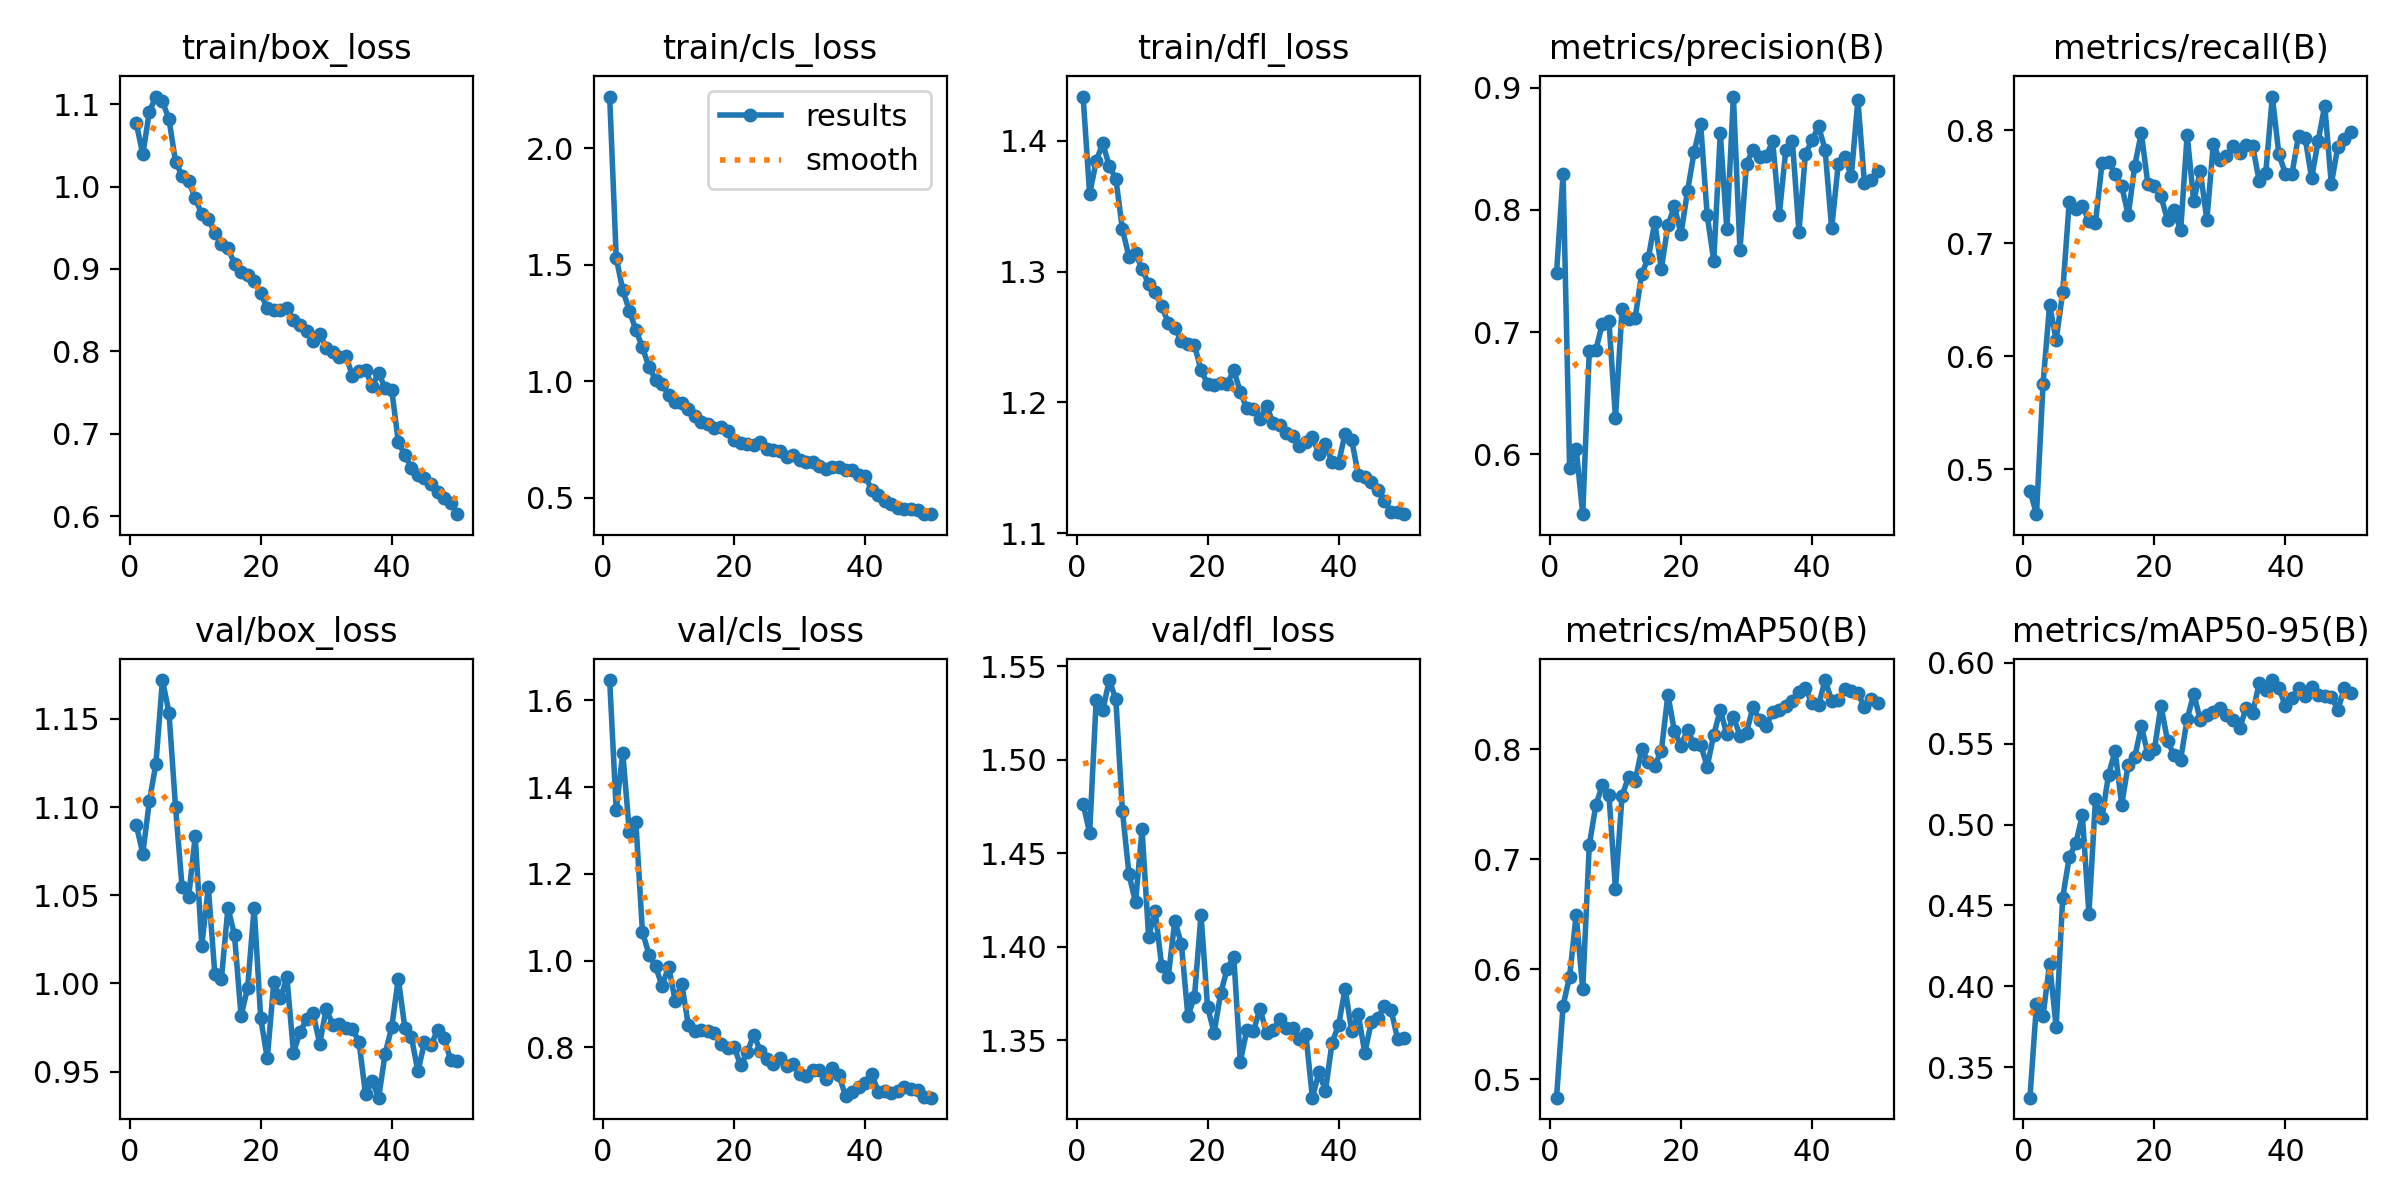

In [ ]:
# Mostrar resultados en Colab
from IPython.display import Image, display
display(Image(filename='runs/train/clothing_freeze10_x/results.png'))

In [ ]:
# 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Crear carpeta de destino
!mkdir -p /content/drive/MyDrive/YOLOv8/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 3. Copiar el modelo entrenado
!cp runs/train/clothing_freeze10_x/weights/best.pt /content/drive/MyDrive/YOLOv8/clothing_freeze10.pt